In [93]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
import random
import pandas as pd
import numpy as np
import shutil



In [94]:
data_dir='/kaggle/input/mango-leaf-disease-dataset'

In [95]:
classes=os.listdir(data_dir)
classes

['Powdery Mildew',
 'Cutting Weevil',
 'Anthracnose',
 'Bacterial Canker',
 'Sooty Mould',
 'Gall Midge',
 'Healthy',
 'Die Back']

In [96]:
Img_dir_train = data_dir


In [97]:
Img_dir_valid = data_dir


In [98]:
transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(256),
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 10

trainset = torchvision.datasets.ImageFolder(root=Img_dir_train,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root=Img_dir_valid,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=2,shuffle=True, num_workers=2)


In [99]:
len(trainloader)

400

In [100]:
len(testloader)

2000

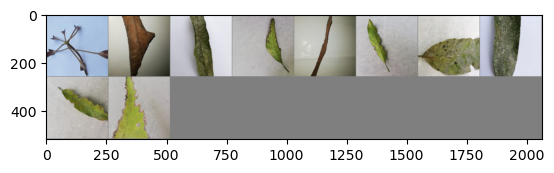

Anthracnose Bacterial Canker Healthy Cutting Weevil Bacterial Canker Cutting Weevil Die Back Healthy Cutting Weevil Cutting Weevil


In [101]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
accur=[]

In [102]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 18, 5)
        self.fc1 = nn.Linear(18 * 61 * 61, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [103]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [104]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0],data[1]
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 1.938
[1,   400] loss: 1.505
[2,   200] loss: 1.192
[2,   400] loss: 0.996
[3,   200] loss: 0.695
[3,   400] loss: 0.684
Finished Training


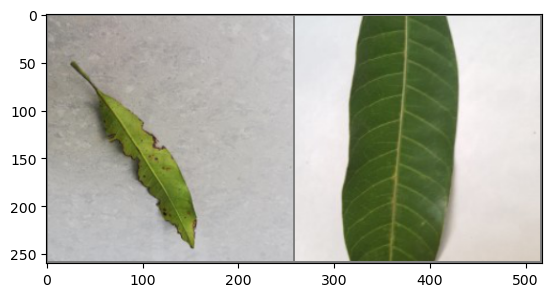

GroundTruth:  Cutting Weevil Gall Midge


In [105]:
dataiter = iter(testloader)
images, labels =next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(2)))

In [106]:
outputs = net(images)

In [107]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(2)))

Predicted:  Die Back Die Back


In [108]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        inputs, labels = data[0],data[1]
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')
accur.append(100* correct // total)

Accuracy of the network on the test images: 82 %


In [109]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0],data[1]
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    if classname=='SootyMould':
        SootyMould=accuracy
    elif classname=='PowderyMildew':
        PowderyMildew=accuracy
    elif classname=='Healthy':
        Healthy=accuracy
    elif classname=='GallMidge':
        GallMidge=accuracy  
    elif classname=='DieBack':
        DieBack=accuracy
    elif classname=='CuttingWeevil':
        CuttingWeevil=accuracy
    elif classname=='BacterialCanker':
        BacterialCanker=accuracy
    elif classname=='Anthracnose':
        Anthracnose=accuracy
        
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    



Accuracy for class: Powdery Mildew is 81.4 %
Accuracy for class: Cutting Weevil is 94.0 %
Accuracy for class: Anthracnose is 92.2 %
Accuracy for class: Bacterial Canker is 96.2 %
Accuracy for class: Sooty Mould is 41.2 %
Accuracy for class: Gall Midge is 80.6 %
Accuracy for class: Healthy is 90.0 %
Accuracy for class: Die Back is 84.4 %


In [110]:
accur=[22,52,55]

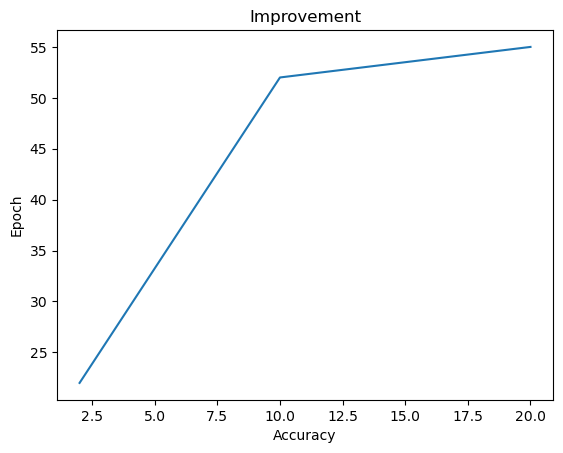

In [111]:
accur
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = [1,2,3]
# corresponding y axis values
y = [2,10,20]

# plotting the points
plt.plot(y, accur)

# naming the x axis
plt.xlabel('Accuracy')
# naming the y axis
plt.ylabel('Epoch')

# giving a title to my graph
plt.title('Improvement')

# function to show the plot
plt.show()
